In [13]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_csv('capmetro_UT.csv')
df[:5]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [9]:
df.columns.values

array(['timestamp', 'boarding', 'alighting', 'day_of_week', 'temperature',
       'hour_of_day', 'month', 'weekend'], dtype=object)

In [10]:
from datetime import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

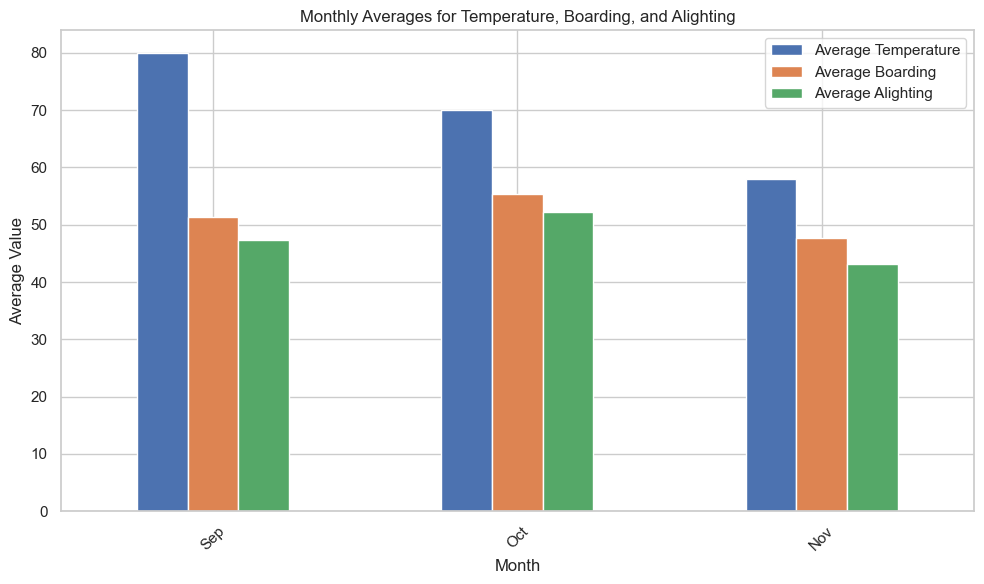

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('capmetro_UT.csv')

# Calculate the rate (boarding - alighting)
df['Rate'] = df['boarding'] - df['alighting']

# Group data by month and calculate average temperature, boarding, and alighting
monthly_stats = df.groupby('month')[['temperature', 'boarding', 'alighting']].mean().sort_values(by='temperature', ascending=False)

# Create a bar graph
ax = monthly_stats.plot(kind='bar', figsize=(10, 6))

ax.set_title("Monthly Averages for Temperature, Boarding, and Alighting")
ax.set_xlabel("Month")
ax.set_ylabel("Average Value")
ax.legend(["Average Temperature", "Average Boarding", "Average Alighting"])
ax.set_xticklabels(monthly_stats.index, rotation=45)

plt.tight_layout()
plt.show()

/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/799971809.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_boarding_weekdays = month_data[weekdays_mask]['boarding'].mean()
/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/799971809.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_boarding_weekends = month_data[weekends_mask]['boarding'].mean()


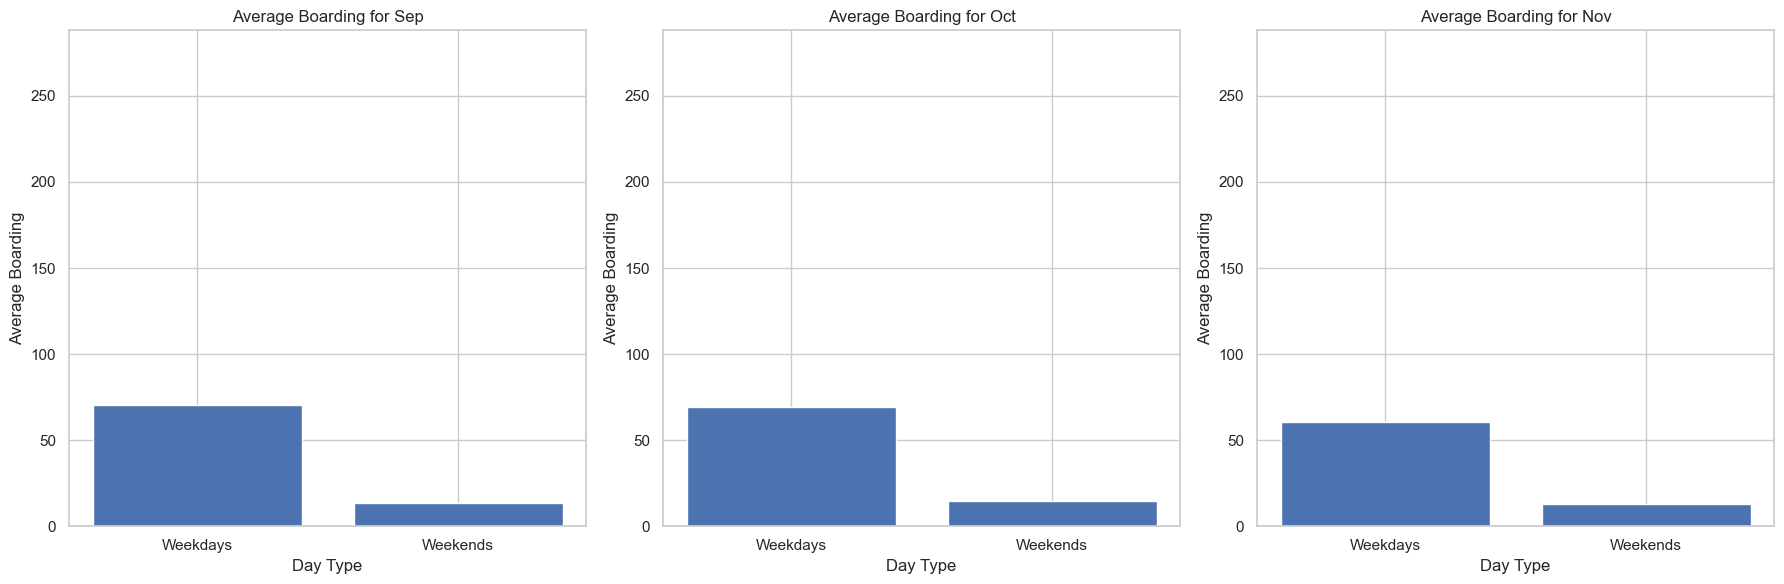

In [140]:
# Create a mask for weekdays and weekends
weekdays_mask = df['weekend'] == 'weekday'
weekends_mask = df['weekend'] == 'weekend'

# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

months = df['month'].unique()

for i, month in enumerate(months):
    month_data = df[df['month'] == month]
    avg_boarding_weekdays = month_data[weekdays_mask]['boarding'].mean()
    avg_boarding_weekends = month_data[weekends_mask]['boarding'].mean()
    
    # Create a bar graph for each month
    axes[i].bar(['Weekdays', 'Weekends'], [avg_boarding_weekdays, avg_boarding_weekends])
    axes[i].set_title(f"Average Boarding for {month}")
    axes[i].set_xlabel("Day Type")
    axes[i].set_ylabel("Average Boarding")
    axes[i].set_ylim(0, df['boarding'].max())  # Set y-axis limit to match the data range

plt.tight_layout()
plt.show()


/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/462740599.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_alighting_weekdays = month_data[weekdays_mask]['alighting'].mean()
/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/462740599.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_alighting_weekends = month_data[weekends_mask]['alighting'].mean()


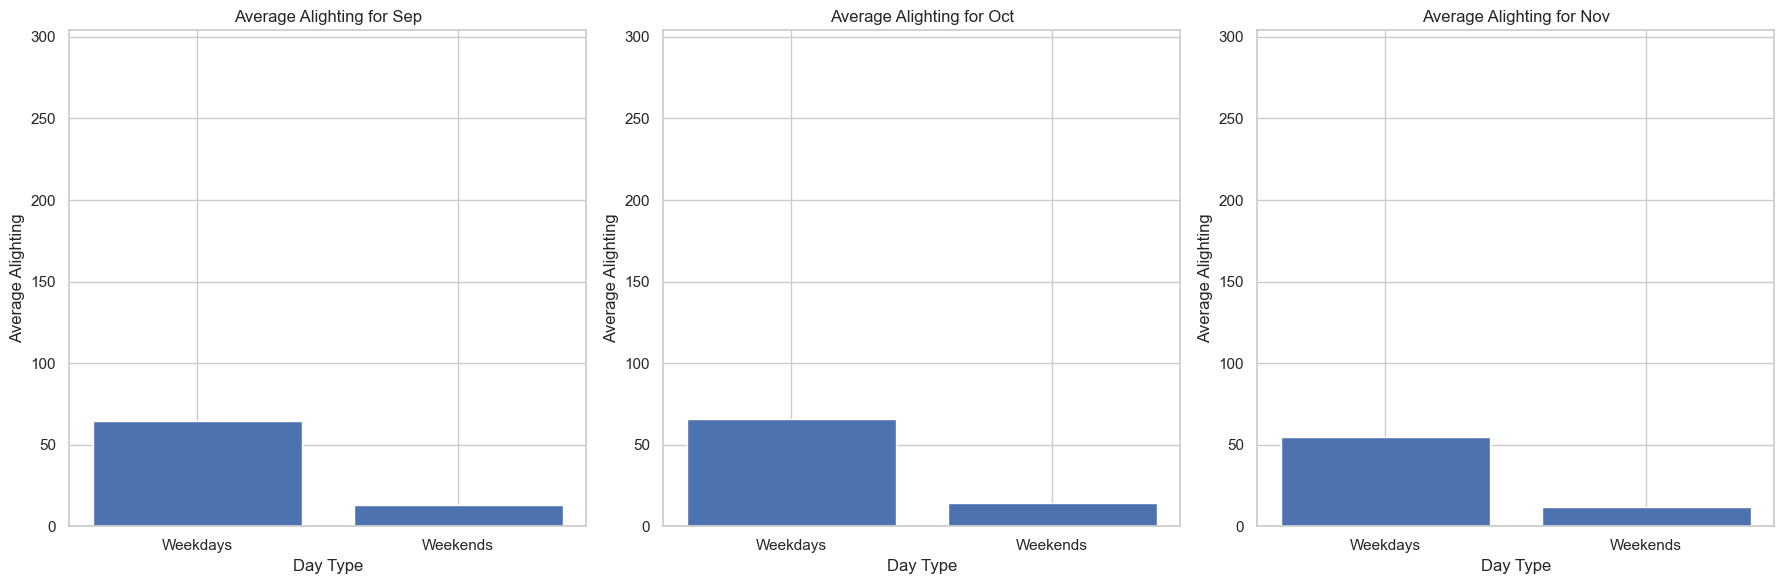

In [142]:
# Create a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)

months = df['month'].unique()

for i, month in enumerate(months):
    month_data = df[df['month'] == month]
    avg_alighting_weekdays = month_data[weekdays_mask]['alighting'].mean()
    avg_alighting_weekends = month_data[weekends_mask]['alighting'].mean()
    
    # Create a bar graph for each month
    axes[i].bar(['Weekdays', 'Weekends'], [avg_alighting_weekdays, avg_alighting_weekends])
    axes[i].set_title(f"Average Alighting for {month}")
    axes[i].set_xlabel("Day Type")
    axes[i].set_ylabel("Average Alighting")
    axes[i].set_ylim(0, df['alighting'].max())  # Set y-axis limit to match the data range

plt.tight_layout()
plt.show()

We are going to observe the Monthly Averages for Temperature, Boarding, and Alighting, the Average Boarding for Each of the Months and the Average Alighting for Each of the Months. 

Being a frequent user of Cap Metro, prior to plotting the graphs, I had made the hypothese that as the average temperature decreases from the month of September to November, less people would board the bus since the weather would get cooler, discouraging them to use the bus. However, in the graph above, we notice a small increase in the average boarding in the month of October. As more people are boarding the bus, more people will therefore alight the bus.  

While it is difficult to state a reason for the increase in boarding and alighting in the month of October, some of the possible factors could be that a lot of events and concerts take place in UT in the month of October, people prefer using the public transportation when the weather is pleasant or because Cap Metro might have given away some promotional offers during the time. 

With the Average Boarding and Alighting for each of the months, I wanted to see if there is a change in the average boarding and alighting based on the day of the week however, there was no significant change. 

However, based on the graphs above, it is safe to say that temperature or month don't have a significant effect on the average boarding and alighting.

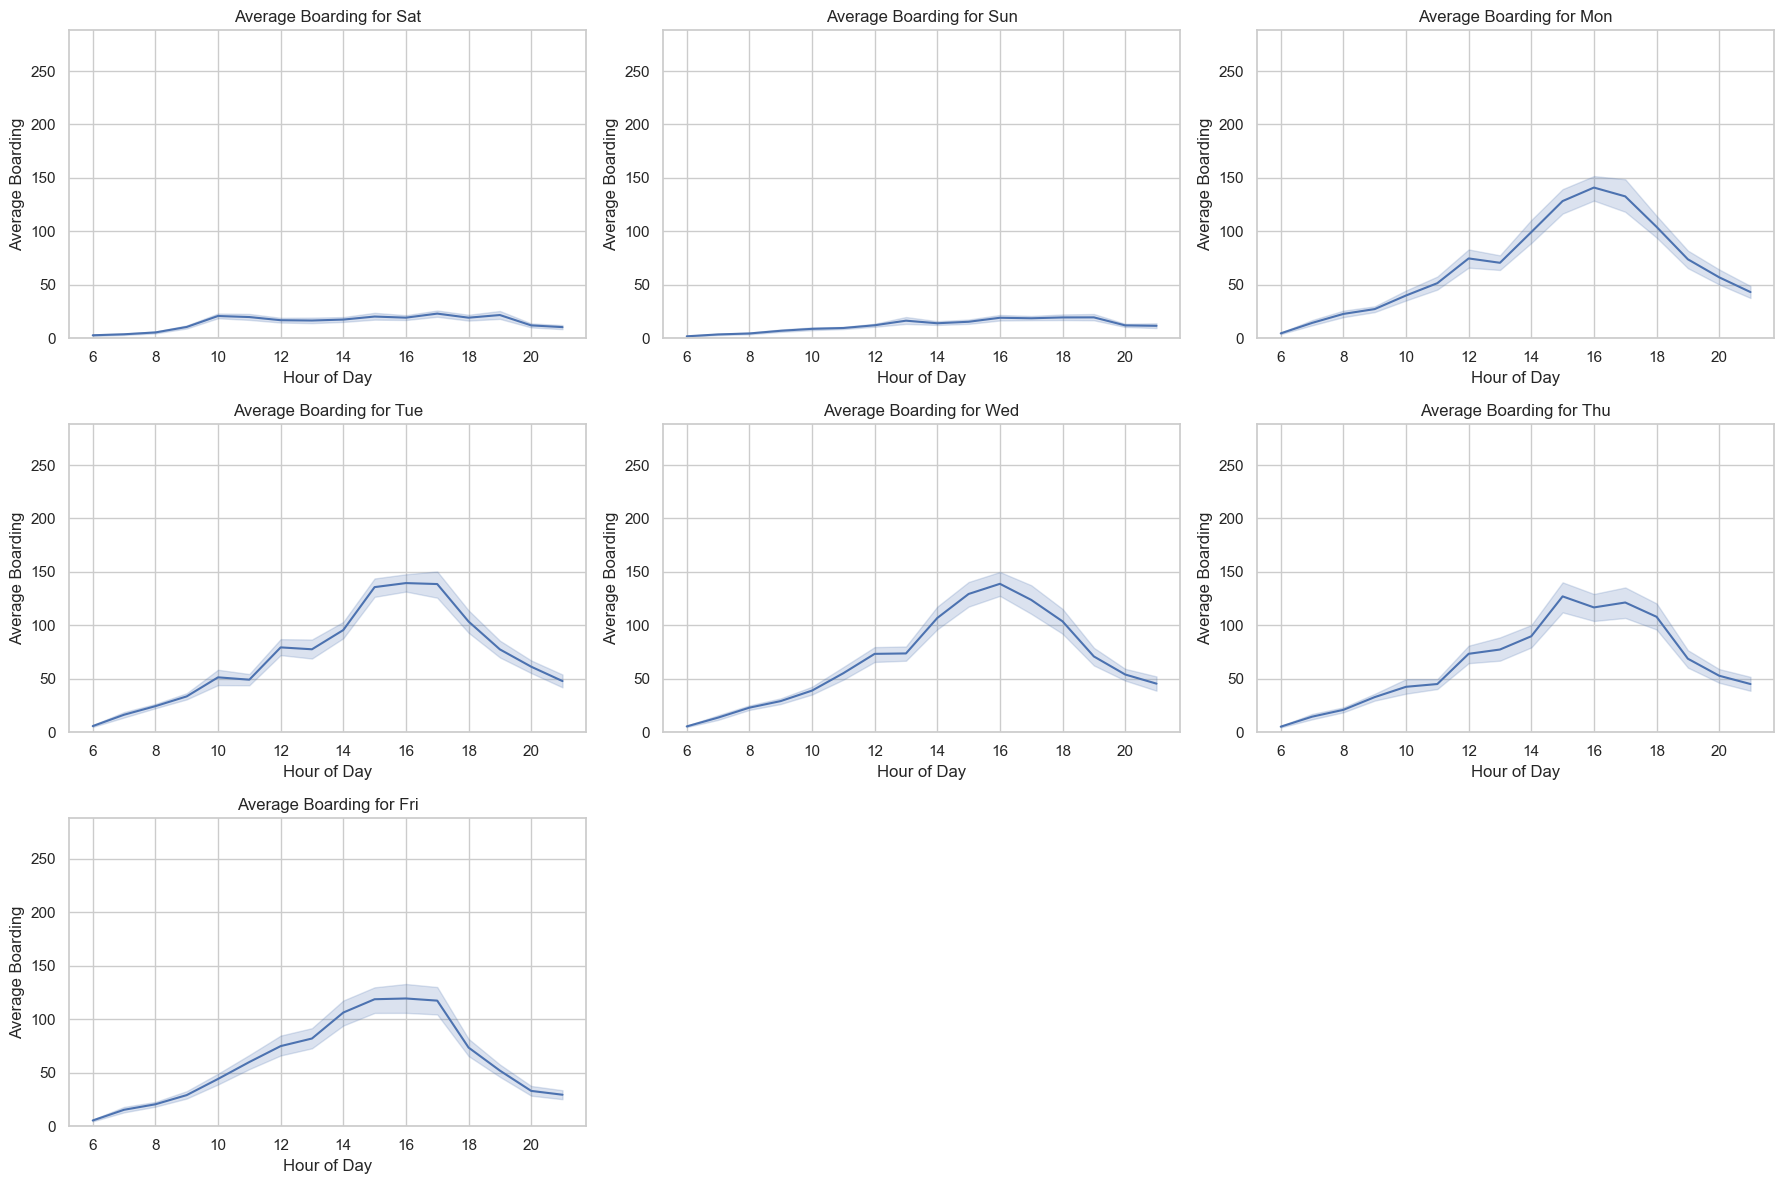

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('capmetro_UT.csv')

# Create a list of unique days of the week
days_of_week = df['day_of_week'].unique()

# Create a grid of subplots based on the number of days
num_cols = 3
num_rows = (len(days_of_week) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Loop through each day of the week and create a line plot
for i, day in enumerate(days_of_week):
    day_data = df[df['day_of_week'] == day]
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.lineplot(x='hour_of_day', y='boarding', data=day_data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Average Boarding for {day}")
    axes[row_idx, col_idx].set_xlabel("Hour of Day")
    axes[row_idx, col_idx].set_ylabel("Average Boarding")
    axes[row_idx, col_idx].set_ylim(0, df['boarding'].max())  # Set y-axis limit to match the data range

# Remove any extra empty subplots
for i in range(len(days_of_week), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()


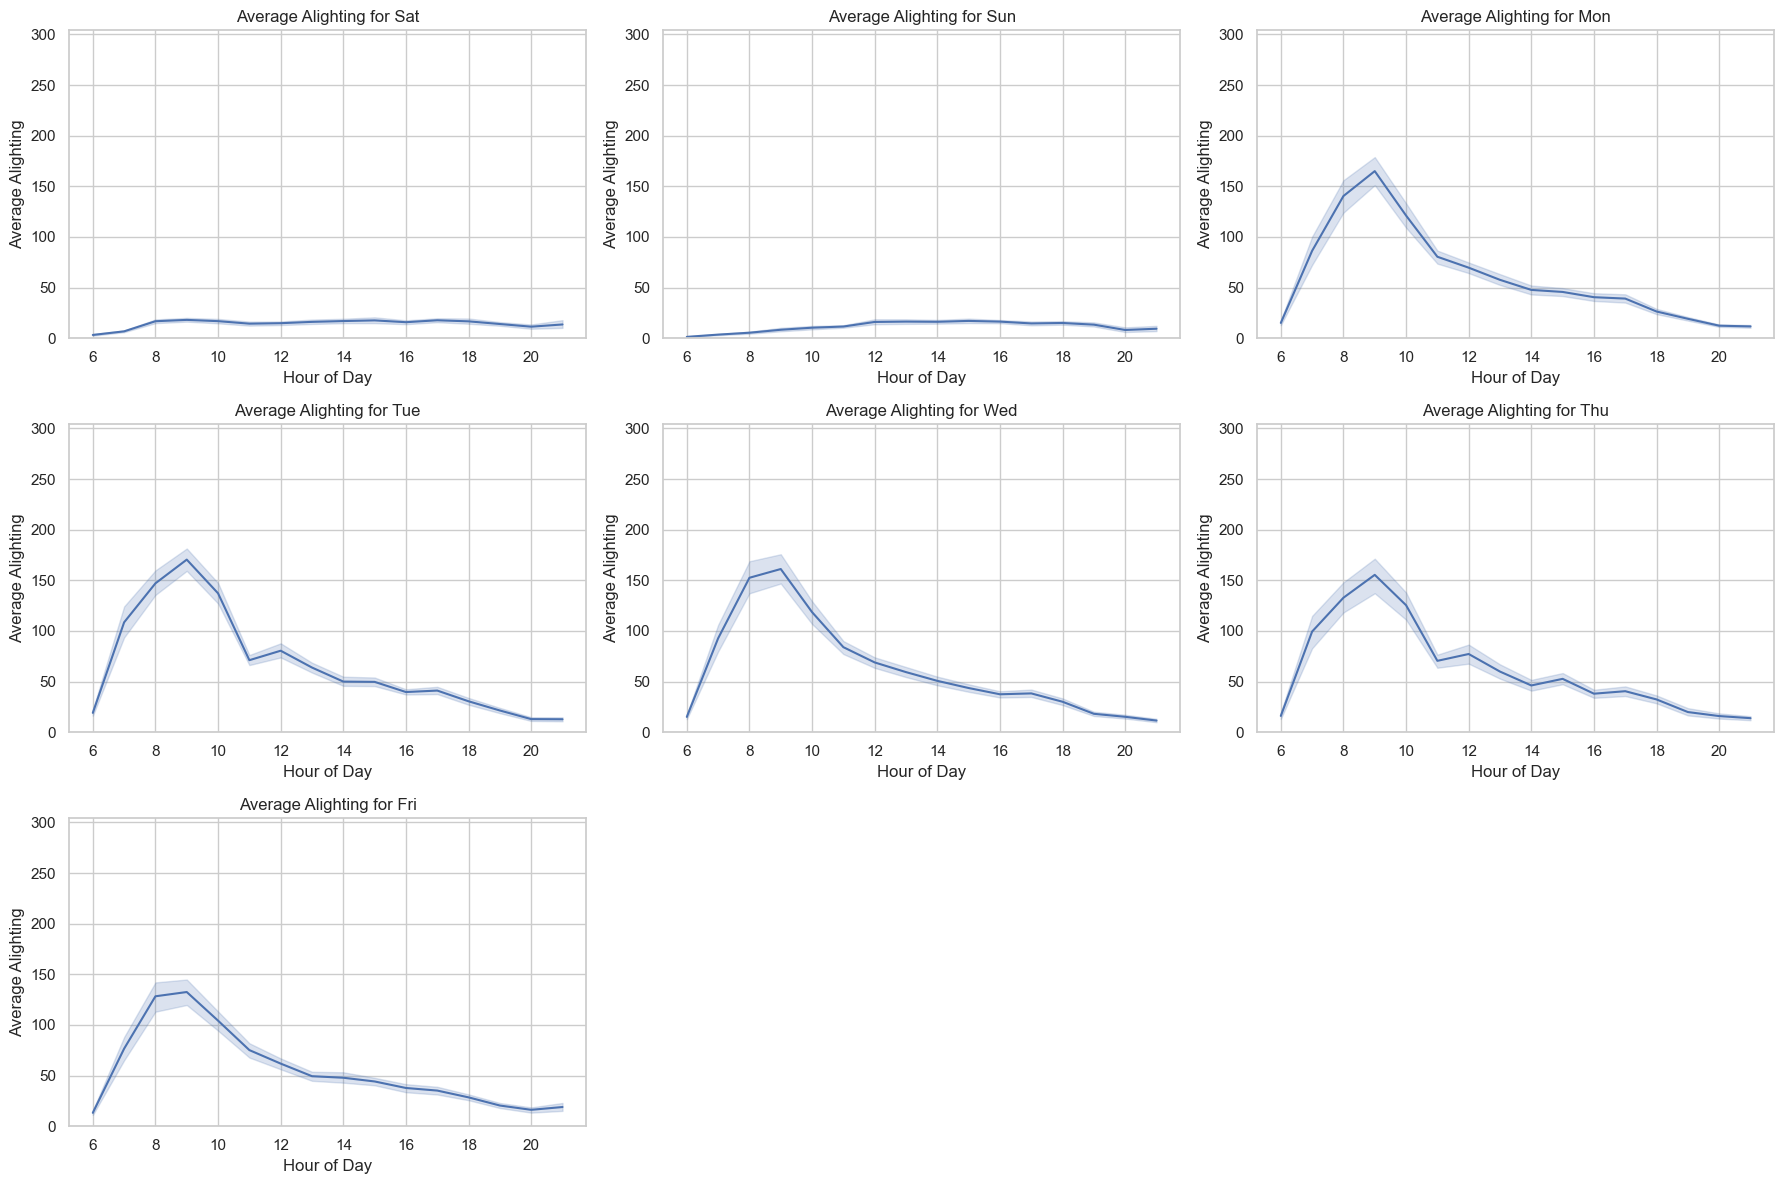

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('capmetro_UT.csv')

# Create a list of unique days of the week
days_of_week = df['day_of_week'].unique()

# Create a grid of subplots based on the number of days
num_cols = 3
num_rows = (len(days_of_week) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Loop through each day of the week and create a line plot
for i, day in enumerate(days_of_week):
    day_data = df[df['day_of_week'] == day]
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.lineplot(x='hour_of_day', y='alighting', data=day_data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Average Alighting for {day}")
    axes[row_idx, col_idx].set_xlabel("Hour of Day")
    axes[row_idx, col_idx].set_ylabel("Average Alighting")
    axes[row_idx, col_idx].set_ylim(0, df['alighting'].max())  # Set y-axis limit to match the data range

# Remove any extra empty subplots
for i in range(len(days_of_week), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

For the next section, we are going to observe graphs for the Average Boarding and the Average Alighting for each day of the week. As expected, fewer people board and alight the bus on the weekends while on the weekdays, most people alight the bus in the morning between 8AM and 10AM (students arrive to class) and most people board the bus in the afternoon between 3PM and 5PM (students are going back home).